In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('braila-flow-anomaly-raw.csv', sep = ';')

for i in range(len(data)):
    data['flow'][i] = float(data['flow'].values[i].replace(',', '.'))
    data['pressure'][i] = float(data['pressure'].values[i].replace(',', '.'))

In [35]:
display(data)

,time,flow,pressure
0,11/26/2021 13:14:00,2.09,1.12
1,11/26/2021 13:13:00,2.08,1.12
2,11/26/2021 13:12:00,2.07,1.12
3,11/26/2021 13:11:00,2.05,1.12
4,11/26/2021 13:10:00,2.03,1.08
...,...,...,...
7986,11/21/2021 00:04:00,1.43,0.84
7987,11/21/2021 00:03:00,1.43,0.88
7988,11/21/2021 00:02:00,1.42,0.88
7989,11/21/2021 00:01:00,1.42,0.84


(0.0, 4.0)

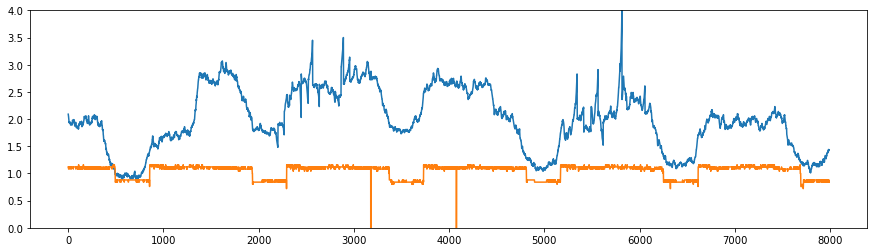

In [37]:
fig, ax = plt.subplots(figsize = (15, 4))

ax.plot(data['flow'])
ax.plot(data['pressure'])

plt.ylim([0, 4])


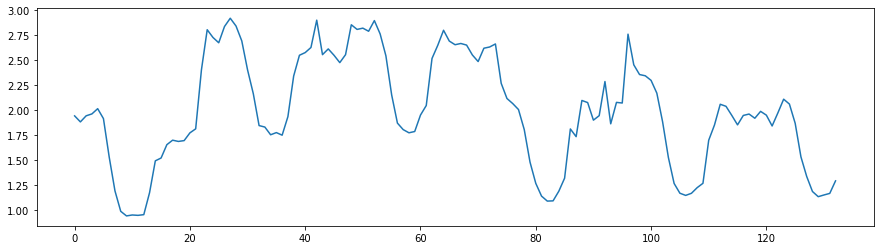

In [58]:
mins = 60
averaged_flow = []

for i in range(mins, len(data['flow']), mins):
    averaged_flow.append(np.mean(data['flow'][i-mins:i].values))
    
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(averaged_flow)

In [110]:
all_data = pd.read_csv('../../data/Braila_new_data/braila_flow211306H360.csv')
display(all_data)

,time,flow_rate_value,totalizer1,totalizer2,consumer_totalizer,analog_input1,analog_input2,batery_capacity,alarms_in_decimal
0,1.608036e+09,0.0,0.0,0.0,0.0,0.027,0.494,47.0,68295800.0
1,1.608036e+09,0.0,0.0,0.0,0.0,0.034,0.494,47.0,68295800.0
2,1.608036e+09,0.0,0.0,0.0,0.0,0.027,0.496,47.0,68295800.0
3,1.608037e+09,0.0,0.0,0.0,0.0,0.027,0.497,47.0,68295800.0
4,1.608037e+09,0.0,0.0,0.0,0.0,0.027,0.496,47.0,68295800.0
...,...,...,...,...,...,...,...,...,...
487229,1.638766e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487230,1.638766e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487231,1.638766e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487232,1.638766e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.0, 40.0)

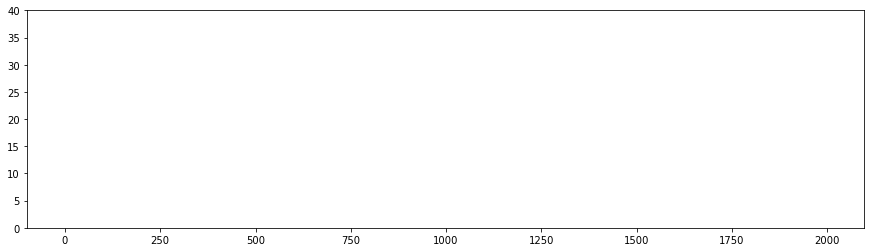

In [112]:
mins = 60
averaged_flow = []

for i in range(mins, len(all_data['flow_rate_value']), mins):
    averaged_flow.append(np.mean(all_data['flow_rate_value'][i-mins:i].values))
    
fig, ax = plt.subplots(figsize = (15, 4))
ax.plot(averaged_flow[5000:7000])
plt.ylim([0, 40])

In [113]:
o = {
    'timestamp': all_data['time'].values[2000:5000],
    'value': averaged_flow[2000:5000]
}
o = pd.DataFrame(o)
display(o)

,timestamp,value
0,1.608221e+09,123.865233
1,1.608221e+09,124.637500
2,1.608221e+09,114.058567
3,1.608221e+09,104.100117
4,1.608221e+09,88.594717
...,...,...
2995,1.608401e+09,111.068383
2996,1.608401e+09,107.967783
2997,1.608401e+09,106.379067
2998,1.608401e+09,103.185833


In [114]:
o.to_csv('braila_flow211306H360_train.csv', index = False)